# Finding Heavy Traffic Indicators for I-94 Interstate Highway

In this project, we aim to determine the indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

### Summary of Result

After analyzing the data, we discovered that there are different indicators for heavy traffic for daytime and nighttime traffic respectively.

There is much higher traffic during daytime (hours from 7am - 7pm) than nighttime (hours from 7pm - 7am).

Both daytime and nighttime traffic are affected by two types of indicators:
- Time indicators such as holiday seasons, business days, etc.
- Weathor indicators such as snow, rain, thunderstorm, etc.

For more details, please refer to the the full analysis below.

## Exploring Existing Data to Avoid Supplementary Costs with Surveys

We will analyze the [dataset](https://en.wikipedia.org/wiki/Interstate_94) recorded by a station located approximately midway between Minneapolis and Saint Paul. Only westbound traffic (cars moving from east to west) is recorded and will be analyzed in the project.

The dataset can be downloaded in this [link](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [74]:
df_traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df_traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [75]:
df_traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [76]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


__Observation:__

- There are 48204 rows
- There are 8 columns
- No null value is found in the data set

## Exploring Overall Traffic Volume

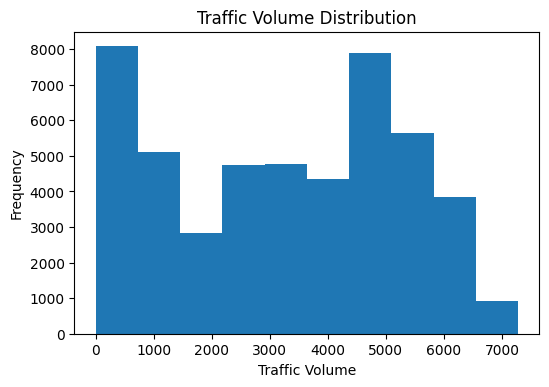

In [77]:
df_traffic['traffic_volume'].plot.hist()
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.show()

In [78]:
df_traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

__Observation:__

Traffic volume recorded in the dataset ranges from 0 - 7280 units per hour. Average traffic volume is units per hour and heaviest traffic recorded is 7280 units per hour.

The most common traffic volume are these two ranges:
- 0 - 1000 units per hour
- 4500 - 5500 units per hour

##  Exploring Traffic Volume: Day vs Night

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [79]:
df_traffic['date_time'] = pd.to_datetime(df_traffic['date_time'])

In [80]:
df_traffic['date_time_hour'] = df_traffic['date_time'].dt.hour

In [81]:
# Create a daytime traffic dataset
df_daytime = df_traffic[(df_traffic['date_time_hour'] >= 7) & (df_traffic['date_time_hour'] < 19)]

In [82]:
# Create a nighttime traffic dataset
df_nighttime = df_traffic[(df_traffic['date_time_hour'] >= 19) | (df_traffic['date_time_hour'] <7)]

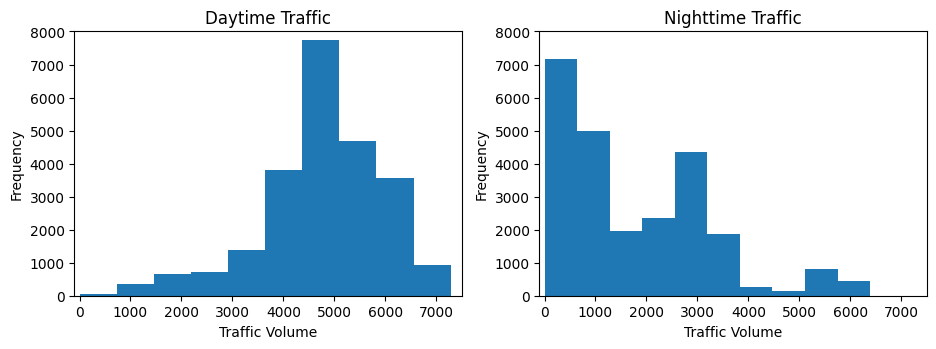

In [83]:
# Compare daytime and nighttime traffic
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
# daytime histogram
df_daytime['traffic_volume'].plot.hist()
plt.title('Daytime Traffic')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
# nighttime histogram
df_nighttime['traffic_volume'].plot.hist()
plt.title('Nighttime Traffic')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.xlabel('Traffic Volume')

plt.show()

In [84]:
df_daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [85]:
df_nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

__Observation:__

We see that daytime and nighttime have distinct traffic volume distribution.

Daytime traffic is a normal distribution with average traffic volume of 4762 units per hour.

Nighttime traffic is a right skewed distribution with average traffic volume of 1785 units per hour, meaning that the traffic volume tends to be lower in general.

## Focusing Analysis on Daytime Traffic

Previously, we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

##  Daytime Traffic Volume: Month

In [86]:
df_daytime['month'] = df_daytime['date_time'].dt.month
by_month = df_daytime.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-86-38b40669d819>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

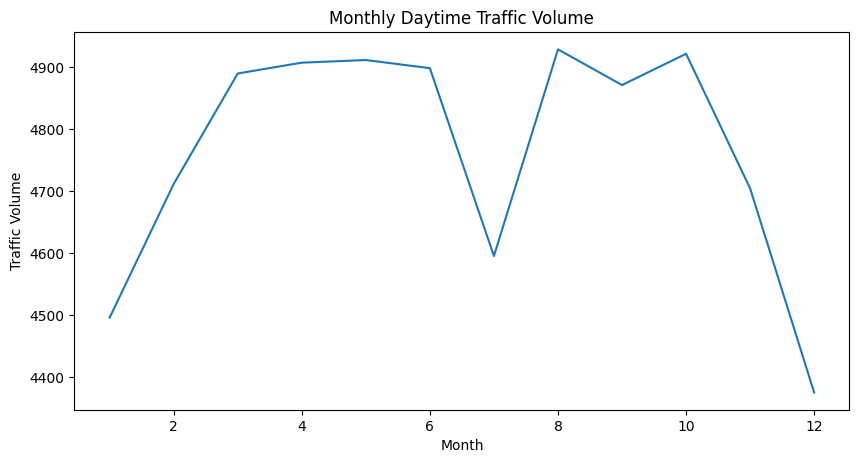

In [87]:
plt.figure(figsize=(10,5))

by_month['traffic_volume'].plot.line()
plt.title('Monthly Daytime Traffic Volume')
plt.ylabel('Traffic Volume')
plt.xlabel('Month')
plt.show()

__Observation:__

Average daytime traffic ranges from 4300 - 4900 units per hour throughout the years, while we see a decline in daytime traffic in:
- June to August
- October to January

It is possible that there is less traffic in this route during holiday seasons.

## Daytime Traffic Volume: Day of the Week

In [88]:
df_daytime['dayofweek'] = df_daytime['date_time'].dt.dayofweek
by_dayofweek = df_daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-88-e6c52a7f2852>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

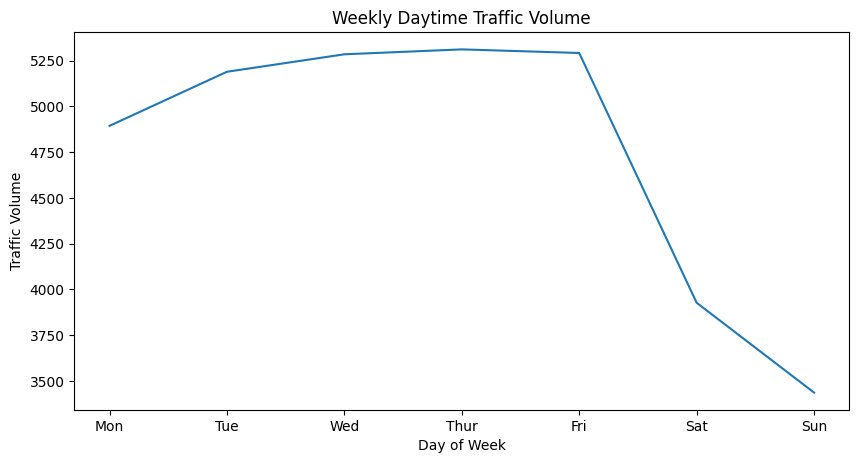

In [89]:
plt.figure(figsize=(10,5))

by_dayofweek['traffic_volume'].plot.line()
plt.title('Weekly Daytime Traffic Volume')
plt.ylabel('Traffic Volume')
plt.xlabel('Day of Week')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.show()

__Observation:__

There is higher traffic volume during weekdays than weekends.

## Daytime Traffic Volume: Time of Day

We will now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [90]:
df_daytime['hour'] = df_daytime['date_time'].dt.hour
bussiness_days = df_daytime.copy()[df_daytime['dayofweek'] <= 4] # 4 == Friday
weekend = df_daytime.copy()[df_daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-90-24d7c669e3b7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



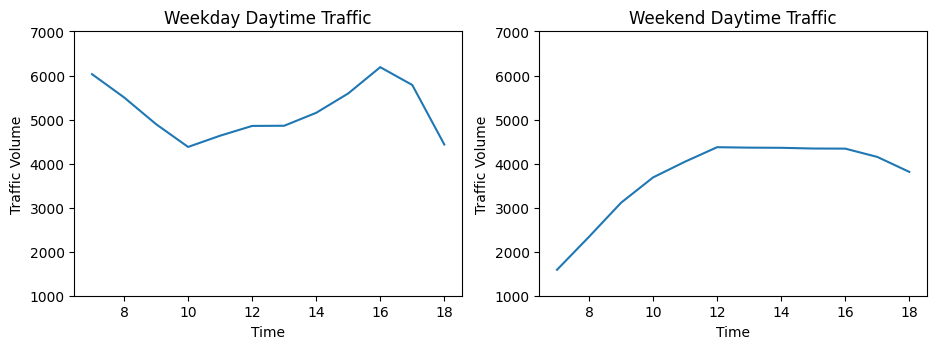

In [91]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
# weekdays traffic
by_hour_business['traffic_volume'].plot.line()
plt.title('Weekday Daytime Traffic')
plt.ylim(1000, 7000)
plt.xlabel('Time')
plt.ylabel('Traffic Volume')

plt.subplot(1, 2, 2)
# weekend traffic
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend Daytime Traffic')
plt.ylim(1000, 7000)
plt.xlabel('Time')
plt.ylabel('Traffic Volume')

plt.show()

__Observation:__

There is higher traffic volume in weekday than weekend daytime.

### Summary of Time Factors in Heavy Traffic

From the analysis above, we observe that:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Daytime Traffic Volume: Weather Factors

In [92]:
df_daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
date_time_hour    0.172704
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

__Observation:__

Except for time factors, other weather factors do not seem to have significant correlations with traffic volume.

In [93]:
by_weather_main = df_daytime.groupby('weather_main').mean()
by_weather_description = df_daytime.groupby('weather_description').mean()

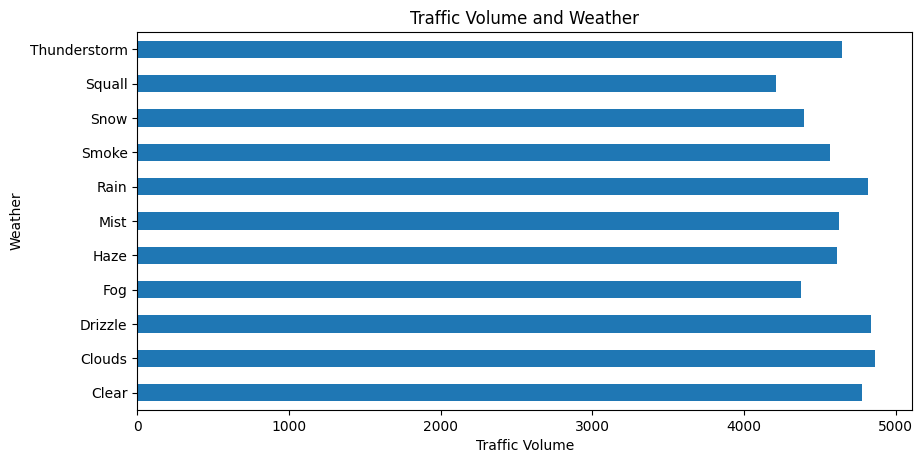

In [94]:
plt.figure(figsize=(10,5))

by_weather_main['traffic_volume'].plot.barh()
plt.title('Traffic Volume and Weather')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.show()

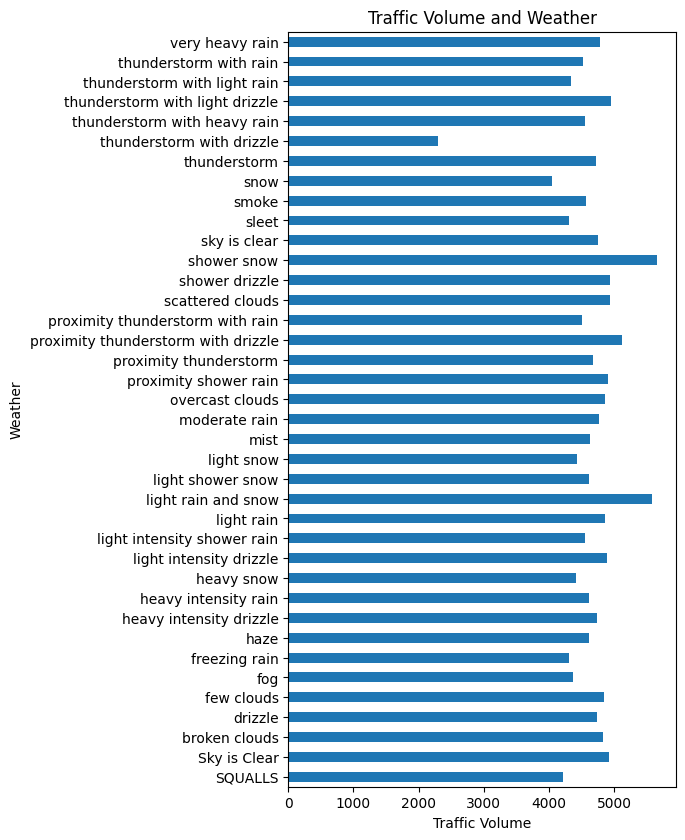

In [95]:
plt.figure(figsize=(5,10))
by_weather_description['traffic_volume'].plot.barh()
plt.title('Traffic Volume and Weather')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.show()

__Observation:__

There are two weather conditions that can be potential heavy traffic indicators (exceed 5000 units per hour):
- Shower snow
- Light rain and snow

## Summary of Heavy Traffic Indicators in Daytime

From the analysis above, we managed to find two types of indicators:

__Time indicators:__
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.

__Weather indicators:__

The traffic is usually heavier during these three weather conditions:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

## Exploring Nighttime Traffic Volume

Even though nightime traffic is usually much lighter compared to daytime traffic, it will be interesting to discover the pattern that influence the traffic volume in this period.

In this section, we are going to replicate the different indicator analysis performed with daytime traffic to nighttime traffic.

In [96]:
df_nighttime['month'] = df_nighttime['date_time'].dt.month
by_month_n = df_nighttime.groupby('month').mean()

<ipython-input-96-9661e197c735>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



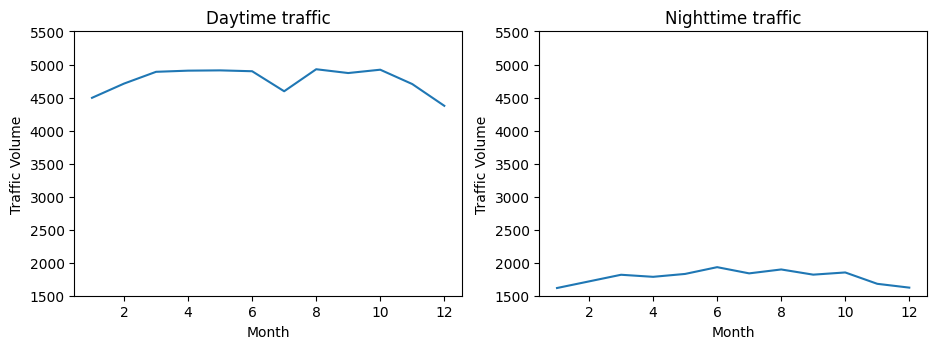

In [97]:
plt.figure(figsize=(11,3.5))

# daytime traffic
plt.subplot(1, 2, 1)
by_month['traffic_volume'].plot(label='day')
plt.ylabel('Traffic Volume')
plt.xlabel('Month')
plt.ylim(1500,5500)
plt.title('Daytime traffic')

# nighttime traffic
plt.subplot(1, 2, 2)
by_month_n['traffic_volume'].plot(label='night')
plt.ylabel('Traffic Volume')
plt.xlabel('Month')
plt.ylim(1500,5500)
plt.title('Nighttime traffic')

plt.show()

__Observation:__

By comparing the daytime traffic and nighttime traffic across different months, the two patterns are similar in general. Holiday seasons seem to play a role in influencing both daytime and nighttime traffic volume.

<ipython-input-98-2490850e4348>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



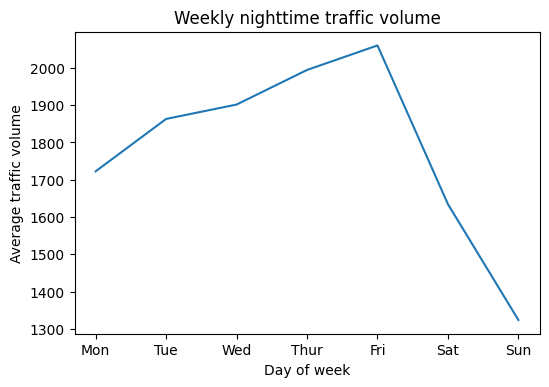

In [98]:
df_nighttime['dayofweek'] = df_nighttime['date_time'].dt.dayofweek
by_dayofweek_n = df_nighttime.groupby('dayofweek').mean()

by_dayofweek_n['traffic_volume'].plot.line()
plt.title('Weekly nighttime traffic volume')
plt.ylabel('Average traffic volume')
plt.xlabel('Day of week')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.show()

__Observation:__

Nightime traffic becomes heavier across the week, especically on Fridays. There is higher traffic volume during weekdays than weekends.

<ipython-input-99-f4c814e409b7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



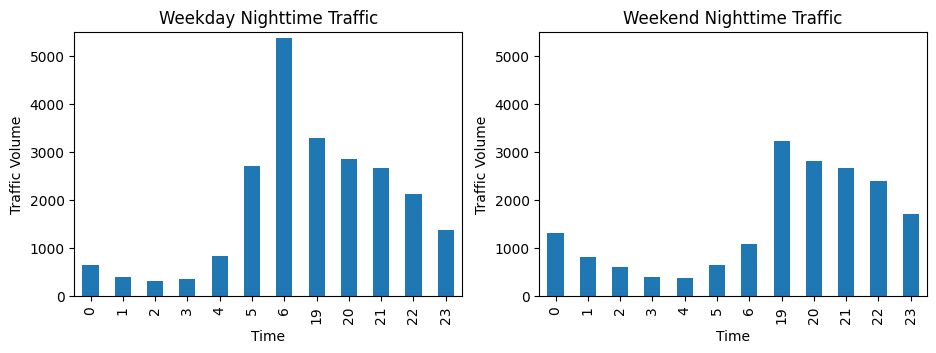

In [99]:
df_nighttime['hour'] = df_nighttime['date_time'].dt.hour
bussiness_days_n = df_nighttime.copy()[df_nighttime['dayofweek'] <= 4] # 4 == Friday
weekend_n = df_nighttime.copy()[df_nighttime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business_n = bussiness_days_n.groupby('hour').mean()
by_hour_weekend_n = weekend_n.groupby('hour').mean()

plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
# weekdays traffic
by_hour_business_n['traffic_volume'].plot.bar()
plt.title('Weekday Nighttime Traffic')
plt.ylim(0, 5500)
plt.ylabel('Traffic Volume')
plt.xlabel('Time')

plt.subplot(1, 2, 2)
# weekend traffic
by_hour_weekend_n['traffic_volume'].plot.bar()
plt.title('Weekend Nighttime Traffic')
plt.ylim(0, 5500)
plt.ylabel('Traffic Volume')
plt.xlabel('Time')

plt.show()

__Observation:__

Rush hours during nighttime are around 6am.

In [100]:
df_nighttime.corr()['traffic_volume']

temp              0.094004
rain_1h          -0.012972
snow_1h          -0.007453
clouds_all        0.012832
traffic_volume    1.000000
date_time_hour    0.454586
month             0.001342
dayofweek        -0.073636
hour              0.454586
Name: traffic_volume, dtype: float64

In [101]:
by_weather_main_n = df_nighttime.groupby('weather_main').mean()
by_weather_description_n = df_nighttime.groupby('weather_description').mean()

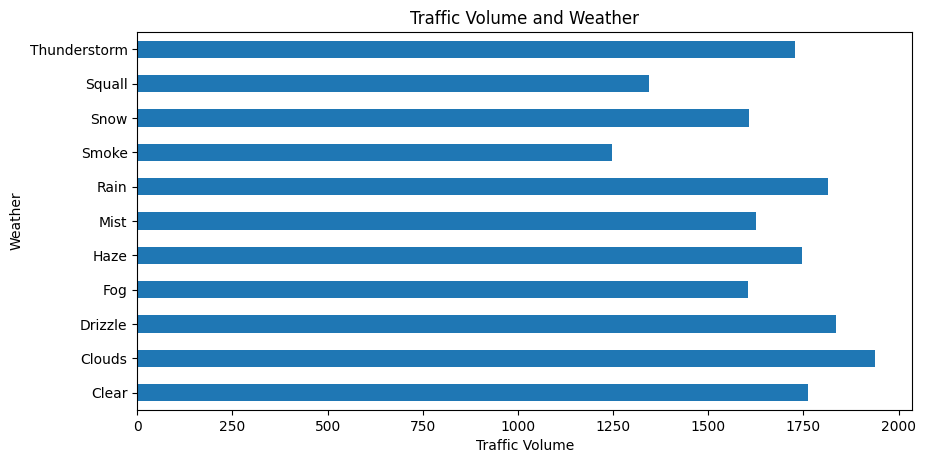

In [102]:
plt.figure(figsize=(10,5))

by_weather_main_n['traffic_volume'].plot.barh()
plt.title('Traffic Volume and Weather')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.show()

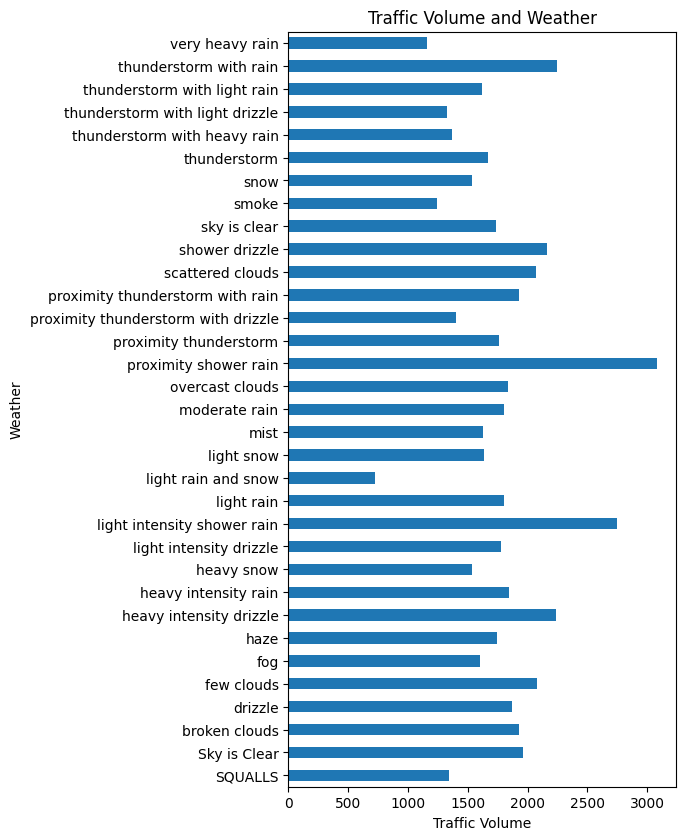

In [103]:
plt.figure(figsize=(5,10))
by_weather_description_n['traffic_volume'].plot.barh()
plt.title('Traffic Volume and Weather')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.show()

__Observation:__

Weather conditions such as proximity shower rain and light intensity shower rain seems to cause heavier traffic during nighttime.

## Conclusion

In this project, we analyzed data of westbound traffic for I-94 Interstate Highway to find the potential indicators of heavy traffic.

We have discovered that there are different indicators for heavy traffic for daytime and nighttime traffic respectively and in general there is much heavier traffic during daytime than nighttime.

Both daytime and nighttime traffic are affected by two types of indicators:
- Time indicators such as holiday seasons, business days, etc.
- Weathor indicators such as snow, rain, thunderstorm, etc.

Daytime traffic is usually heavier during:
- Holiday seasons
- Business days
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

Nighttime traffic is usually heavier during:
- Holiday seasons
- Fridays
- Shower rain
- Light intensity shower rain